# COFFEE SALES DATA ANALYSIS

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Loading the two csv files
file1 = pd.read_csv('index.csv')
file2 = pd.read_csv('index_2.csv')

In [5]:
# Concatenate the two csv files along the rows (handles missing columns)
index = pd.concat([file1, file2], axis=0, ignore_index=True)

In [7]:
# Save the merged data to a new csv file
index.to_csv('index_output.csv', index=False)

In [9]:
# Loading the new csv file
data = pd.read_csv('index_output.csv')

In [11]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,3/1/2024,10:15:51 AM,card,ANON-0000-0000-0001,38.7,Latte
1,3/1/2024,12:19:23 PM,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,3/1/2024,12:20:18 PM,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,3/1/2024,1:46:33 PM,card,ANON-0000-0000-0003,28.9,Americano
4,3/1/2024,1:48:15 PM,card,ANON-0000-0000-0004,38.7,Latte


In [13]:
data.describe()

,money
count,3373.000000
mean,31.620546
std,5.023208
min,15.000000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3373 non-null   object 
 1   datetime     3373 non-null   object 
 2   cash_type    3373 non-null   object 
 3   card         3174 non-null   object 
 4   money        3373 non-null   float64
 5   coffee_name  3373 non-null   object 
dtypes: float64(1), object(5)
memory usage: 158.2+ KB


In [17]:
# Renaming the columns to be more understandable
data = data.rename (columns={'datetime':'time', 'cash_type':'payment_method', 'money':'price'})


In [19]:
data

,date,time,payment_method,card,price,coffee_name
0,3/1/2024,10:15:51 AM,card,ANON-0000-0000-0001,38.7,Latte
1,3/1/2024,12:19:23 PM,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,3/1/2024,12:20:18 PM,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,3/1/2024,1:46:33 PM,card,ANON-0000-0000-0003,28.9,Americano
4,3/1/2024,1:48:15 PM,card,ANON-0000-0000-0004,38.7,Latte
...,...,...,...,...,...,...
3368,2025-02-24,2025-02-24 18:32:28,card,NaN,28.0,Caramel with Irish whiskey
3369,2025-02-24,2025-02-24 18:33:49,card,NaN,28.0,Caramel with Irish whiskey
3370,2025-02-24,2025-02-24 20:15:01,card,NaN,25.0,Caramel with milk
3371,2025-02-25,2025-02-25 21:41:58,card,NaN,29.0,Coffee with Irish whiskey


In [21]:
# Converting the date and datetime column to datetime data type
data['date'] = pd.to_datetime(data['date'],format='mixed')
data['time'] = pd.to_datetime(data['time'],format='mixed')

# Setting the time format to hours, minutes and seconds
data['full_time'] = data['time'].dt.strftime('%H:%M:%S')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            3373 non-null   datetime64[ns]
 1   time            3373 non-null   datetime64[ns]
 2   payment_method  3373 non-null   object        
 3   card            3174 non-null   object        
 4   price           3373 non-null   float64       
 5   coffee_name     3373 non-null   object        
 6   full_time       3373 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 184.6+ KB


In [25]:
data.tail()

,date,time,payment_method,card,price,coffee_name,full_time
3368,2025-02-24,2025-02-24 18:32:28,card,NaN,28.0,Caramel with Irish whiskey,18:32:28
3369,2025-02-24,2025-02-24 18:33:49,card,NaN,28.0,Caramel with Irish whiskey,18:33:49
3370,2025-02-24,2025-02-24 20:15:01,card,NaN,25.0,Caramel with milk,20:15:01
3371,2025-02-25,2025-02-25 21:41:58,card,NaN,29.0,Coffee with Irish whiskey,21:41:58
3372,2025-02-25,2025-02-25 21:43:45,card,NaN,33.0,Latte,21:43:45


In [27]:
data.head()

,date,time,payment_method,card,price,coffee_name,full_time
0,2024-03-01,2025-03-17 10:15:51,card,ANON-0000-0000-0001,38.7,Latte,10:15:51
1,2024-03-01,2025-03-17 12:19:23,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:23
2,2024-03-01,2025-03-17 12:20:18,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18
3,2024-03-01,2025-03-17 13:46:33,card,ANON-0000-0000-0003,28.9,Americano,13:46:33
4,2024-03-01,2025-03-17 13:48:15,card,ANON-0000-0000-0004,38.7,Latte,13:48:15


In [29]:
# Dropping an unnecessary column
data.drop(['time'], axis=1, inplace=True)

# MATPLOTLIB AND SEABORN

How much was paid by each payment method?

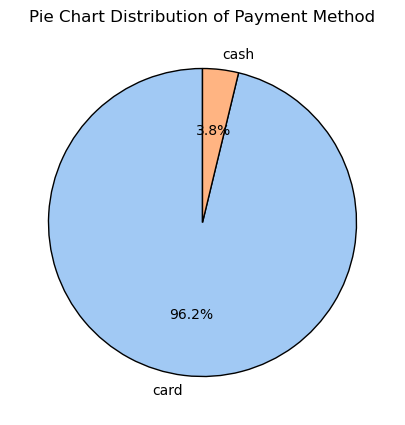

In [31]:
payment_count = data['payment_method'].value_counts()
palette = sns.color_palette('pastel', n_colors=len(payment_count))
fig, ax = plt.subplots(figsize=(7,5))
ax.pie(payment_count, labels=payment_count.index, autopct='%1.1f%%', startangle=90, colors=palette, wedgeprops={'edgecolor':'black'})
ax.set_title('Pie Chart Distribution of Payment Method')
plt.show()

What is the general trend of coffee purchases per day of the week?

In [33]:
#Create a column for day of the week
data['day_of_week_num']= data['date'].dt.weekday

In [35]:
#Group by the number of purchases per day of the week
coffee_count= data.groupby('day_of_week_num')['coffee_name'].count()

In [39]:
coffee_count

day_of_week_num
0    524
1    547
2    440
3    472
4    487
5    466
6    437
Name: coffee_name, dtype: int64

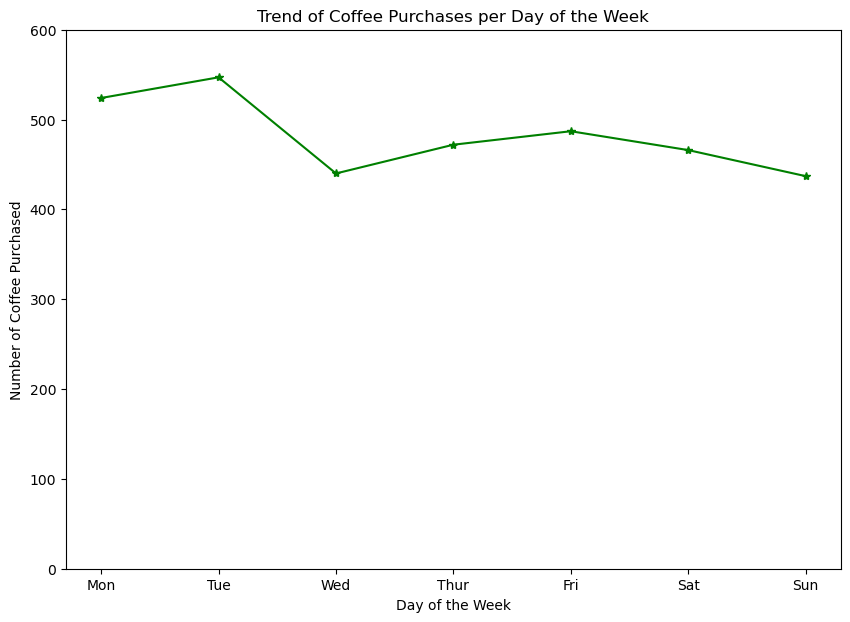

In [41]:
plt.figure(figsize=(10,7))
plt.plot(coffee_count.index, coffee_count.values, marker='*',color='green')

plt.title('Trend of Coffee Purchases per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Coffee Purchased')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.yticks([0,100,200,300,400,500,600])

plt.show()

Group by coffee types to determine which is the best and the least seller.

In [43]:
#Group by the number of sales per coffee type
data['coffee_name'] = data['coffee_name'].str.lower()
coffee_group=data.groupby(['coffee_name']).size().sort_values(ascending=False)
coffee_group

coffee_name
americano with milk           782
latte                         725
americano                     466
cappuccino                    460
cortado                       289
hot chocolate                 256
cocoa                         207
espresso                      134
coffee with irish whiskey       8
double irish whiskey            8
tea                             7
caramel with irish whiskey      5
chocolate with milk             4
mochaccino                      3
irish whiskey                   3
chocolate with coffee           2
caramel with chocolate          2
double espresso with milk       2
double vanilla                  2
irish whiskey with milk         2
super chocolate                 1
double espresso                 1
chocolate                       1
caramel with milk               1
caramel coffee                  1
vanilla with irish whiskey      1
dtype: int64

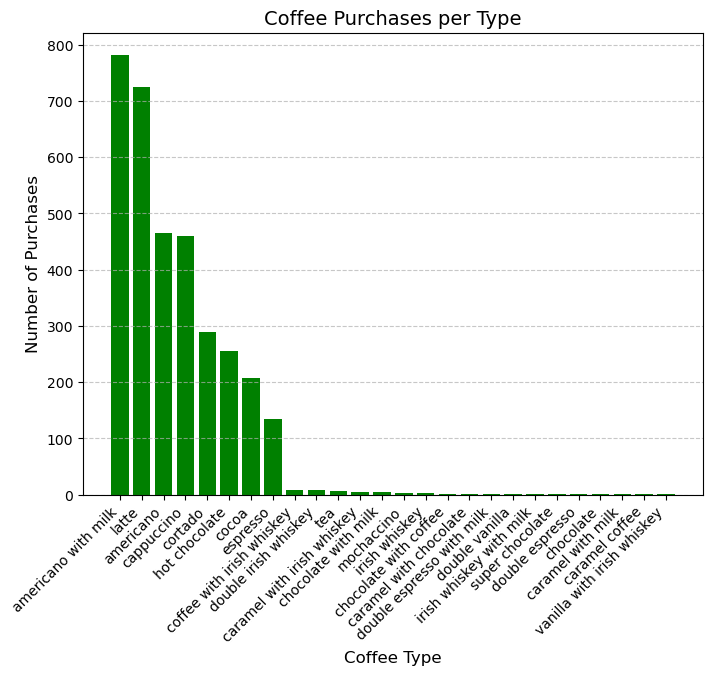

In [45]:
coffee_names = coffee_group.index
purchase_counts = coffee_group.values

plt.figure(figsize=(8,6))
plt.bar(coffee_names, purchase_counts, color='green')

plt.xlabel("Coffee Type", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)
plt.title("Coffee Purchases per Type", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

What are the peak Hours in the store?

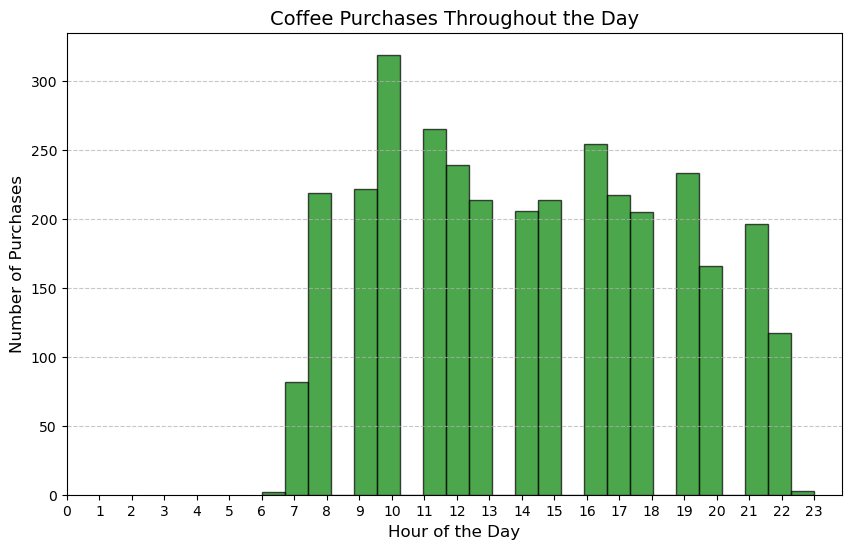

In [47]:
data['hour'] = pd.to_datetime(data['full_time'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(10, 6))
plt.hist(data['hour'], bins=24, color='green', edgecolor='black', alpha=0.7)

plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)
plt.title("Coffee Purchases Throughout the Day", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

What were the revenues for each month?

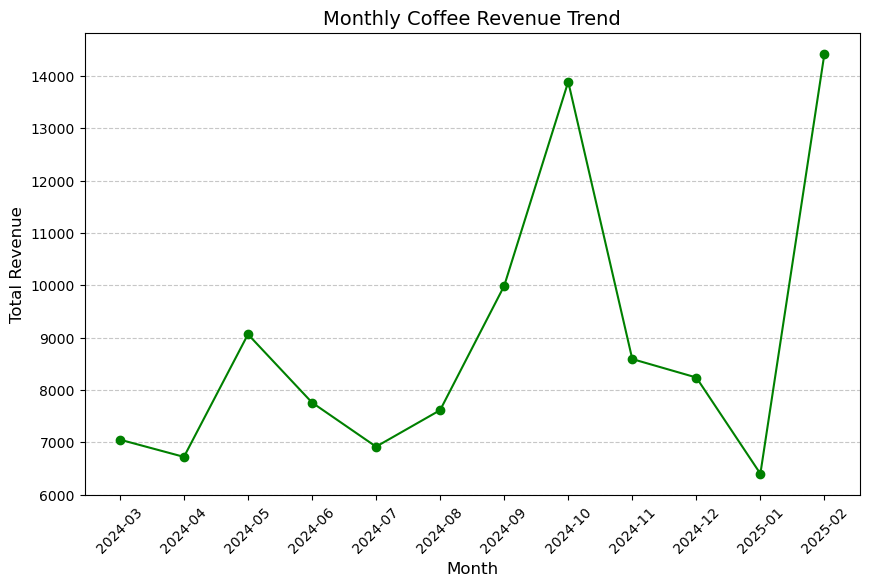

In [50]:
#Creating a column for the month and grouping by the number of sales per month.

data['month'] = data['date'].dt.to_period('M')

monthly_revenue = data.groupby('month')['price'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o', linestyle='-', color='green')

plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.title("Monthly Coffee Revenue Trend", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

What is the median payment amount by credit card versus cash?

In [53]:
#Group by payment method and find the median.
payment_avg = data.groupby('payment_method')['price'].median()

print(payment_avg)

payment_method
card    32.82
cash    34.00
Name: price, dtype: float64


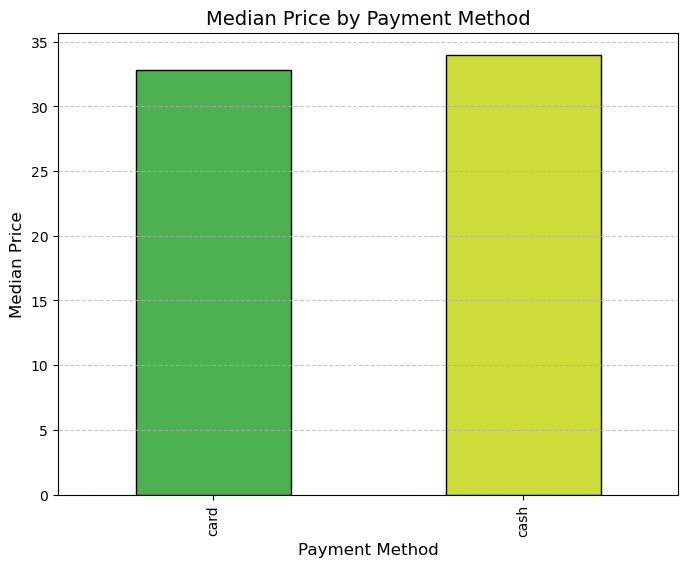

In [55]:
payment_median = data.groupby('payment_method')['price'].median()

plt.figure(figsize=(8, 6))
payment_median.plot(kind='bar', color=['#4CAF50', '#CDDC39'], edgecolor='black')

plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Median Price", fontsize=12)
plt.title("Median Price by Payment Method", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

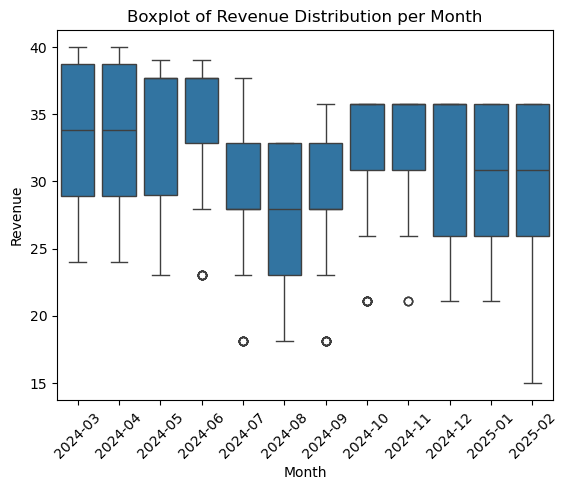

In [67]:
# Create a boxplot
data['month'] = data['date'].dt.to_period('M')

sns.boxplot(x="month", y="price", data=data)

# Add title and labels
plt.title("Boxplot of Revenue Distribution per Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)

# Show the plot
plt.show()